In [1]:
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.1)
tf.config.gpu.set_per_process_memory_growth(True)

In [2]:
# Logic Operator

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)                   # N neurons connected to output            
        self.y        = y
        self.output   = np.zeros(self.y.shape)                # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))

        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2

# Task 1

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.41657842e-04]
 [1.83407074e-02]
 [1.83407074e-02]
 [4.98111459e-01]]
Loss value when number of interations is 10: 0.8091920086651861
Loss value when number of interations is 50: 0.43535602905387394
Loss value when number of interations is 100: 0.3337840899913623
Loss value when number of interations is 500: 0.26200408496874394
Loss value when number of interations is 2000: 0.25256506550325886


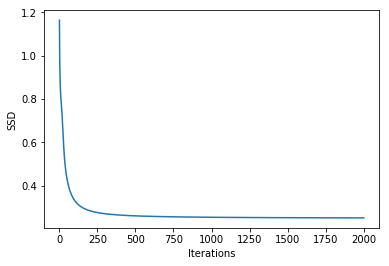

In [4]:
iterations = 2000
n_unit = 1
if __name__ == "__main__": 
    
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[0],[0],[1]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)
    print('Loss value when number of interations is 10:', SSD[9])
    print('Loss value when number of interations is 50:', SSD[49])
    print('Loss value when number of interations is 100:', SSD[99])
    print('Loss value when number of interations is 500:', SSD[499])
    print('Loss value when number of interations is 2000:', SSD[1999])


# In task1, we didn't observe the same results because the weights are created randomly. And the loss values are decreasing as the number of iterations increases.

# Task 2

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.50441338]
 [0.65772237]
 [0.6577229 ]
 [0.6602803 ]]
Loss value when number of interations is 2000: 0.9247105237675957


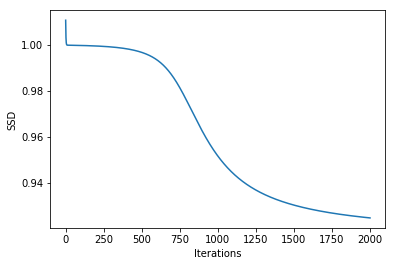

In [7]:
iterations = 2000
n_unit = 1 # n_unit = 2,5,10,50
if __name__ == "__main__": 
    
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[1],[1],[0]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)
    print('Loss value when number of interations is 2000:', SSD[1999])

# In task2, the AND operator has lower loss values when the n_unit = 1. For XOR operator we got bad results beacause we can't classficate the data by only one neuron. When we increase the number of neuros in hidden layers, the results are improved until a certain number of neurons like 10. But when it keep increasing, the results would be worse when n_unit=50.

# Task 3

In [8]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 50 # n_unit = 1, 2, 4, 16, 25, 50

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.1),
              metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 5000, verbose=0)

print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.04599702]
 [0.97463274]
 [0.9749317 ]
 [0.01920033]]


The results before changing learning rate:

n_unit = 1 : The predicted class labels are: [[0.5006155]
 [0.5006155]
 [0.5006155]
 [0.5006155]]

n_unit = 2 : The predicted class labels are: [[0.4742636]
 [0.6396791]
 [0.4742636]
 [0.4742636]]

n_unit = 4 : The predicted class labels are: [[0.48214462]
 [0.50296855]
 [0.5363879 ]
 [0.56410927]]

n_unit = 16 : The predicted class labels are: [[0.4812355 ]
 [0.5457571 ]
 [0.50322366]
 [0.55496365]]

n_unit = 25 : The predicted class labels are: [[0.4812355 ]
 [0.5457571 ]
 [0.50322366]
 [0.55496365]]

n_unit = 50 : The predicted class labels are: [[0.47832686]
 [0.5361162 ]
 [0.5580305 ]
 [0.5018328 ]]
 
The results after setting learning rate = 0.1:
 
 n_unit = 1 : The predicted class labels are: [[0.3339834 ]
 [0.3339834 ]
 [0.97950935]
 [0.3339834 ]]
 
 n_unit = 2 : The predicted class labels are: [[0.33395112]
 [0.9801624 ]
 [0.33395112]
 [0.33395112]]
 
 n_unit = 4 : The predicted class labels are: [[0.04050305]
 [0.97592765]
 [0.9760733 ]
 [0.02017644]]
 
 n_unit = 16 : The predicted class labels are: [[0.04236481]
 [0.9741006 ]
 [0.9739702 ]
 [0.02136591]]
 
 n_unit = 25 : The predicted class labels are: [[0.04128468]
 [0.97560155]
 [0.9754395 ]
 [0.01936913]]
 
 n_unit = 50 : The predicted class labels are: [[0.04492968]
 [0.9754776 ]
 [0.9756963 ]
 [0.01726386]]
 
 # In conclusion, we can see that if we don't change the default learning rate, the results would not be effective. After we changed the learning rate to 0.1, the results improved and we got quiet good results when we increase the n_unit to 4. However, if n_unit keeps increasing, the results won't improve futher. 

# Task 4

In [2]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize


img_w, img_h = 100, 100                                 # Setting the width and heights of the images
data_path = '/Lab1/Skin/'           # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


In [6]:
# MLP Example; Complete the code
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [19]:
def model(Base,img_ch, img_width, img_height):
    model = Sequential()
    model.add(Flatten(input_shape=(img_width, img_height, img_ch)))
    model.add(Dense(Base, activation='relu'))
    model.add(Dense(Base//2, activation='relu'))
    model.add(Dense(Base//4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

MLP1 = model(64,1,100,100)
MLP2 = model(64,1,100,100)
MLP3 = model(64,1,100,100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 642,689
Trainable params: 642,689
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)              

Train on 1000 samples, validate on 200 samples
Epoch 1/60
1000/1000 - 0s - loss: 0.2611 - binary_accuracy: 0.5000 - val_loss: 0.2546 - val_binary_accuracy: 0.5000
Epoch 2/60
1000/1000 - 0s - loss: 0.2530 - binary_accuracy: 0.5000 - val_loss: 0.2499 - val_binary_accuracy: 0.5050
Epoch 3/60
1000/1000 - 0s - loss: 0.2508 - binary_accuracy: 0.5050 - val_loss: 0.2486 - val_binary_accuracy: 0.5000
Epoch 4/60
1000/1000 - 0s - loss: 0.2500 - binary_accuracy: 0.5110 - val_loss: 0.2477 - val_binary_accuracy: 0.5200
Epoch 5/60
1000/1000 - 0s - loss: 0.2494 - binary_accuracy: 0.5220 - val_loss: 0.2473 - val_binary_accuracy: 0.5250
Epoch 6/60
1000/1000 - 0s - loss: 0.2490 - binary_accuracy: 0.5340 - val_loss: 0.2468 - val_binary_accuracy: 0.5500
Epoch 7/60
1000/1000 - 0s - loss: 0.2485 - binary_accuracy: 0.5310 - val_loss: 0.2464 - val_binary_accuracy: 0.5650
Epoch 8/60
1000/1000 - 0s - loss: 0.2481 - binary_accuracy: 0.5590 - val_loss: 0.2462 - val_binary_accuracy: 0.5700
Epoch 9/60
1000/1000 - 0s

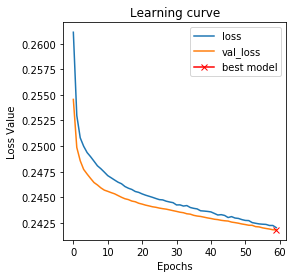

In [20]:
MLP1.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.0001),
              metrics=['binary_accuracy'])

History = MLP1.fit(x_train, y_train, batch_size=16, epochs=60, verbose=2, 
                    validation_data=(x_test, y_test))

%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/60
1000/1000 - 0s - loss: 0.2665 - binary_accuracy: 0.5040 - val_loss: 0.2489 - val_binary_accuracy: 0.5050
Epoch 2/60
1000/1000 - 0s - loss: 0.2479 - binary_accuracy: 0.5530 - val_loss: 0.2463 - val_binary_accuracy: 0.5600
Epoch 3/60
1000/1000 - 0s - loss: 0.2475 - binary_accuracy: 0.5530 - val_loss: 0.2456 - val_binary_accuracy: 0.5050
Epoch 4/60
1000/1000 - 0s - loss: 0.2472 - binary_accuracy: 0.5590 - val_loss: 0.2496 - val_binary_accuracy: 0.5000
Epoch 5/60
1000/1000 - 0s - loss: 0.2433 - binary_accuracy: 0.5480 - val_loss: 0.2437 - val_binary_accuracy: 0.5000
Epoch 6/60
1000/1000 - 0s - loss: 0.2444 - binary_accuracy: 0.5580 - val_loss: 0.2632 - val_binary_accuracy: 0.5000
Epoch 7/60
1000/1000 - 0s - loss: 0.2410 - binary_accuracy: 0.6140 - val_loss: 0.2608 - val_binary_accuracy: 0.5100
Epoch 8/60
1000/1000 - 0s - loss: 0.2471 - binary_accuracy: 0.5480 - val_loss: 0.2434 - val_binary_accuracy: 0.4950
Epoch 9/60
1000/1000 - 0s

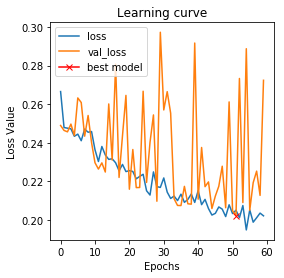

In [21]:
MLP2.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.01),
              metrics=['binary_accuracy'])

History = model_mlp_2layer.fit(x_train, y_train, batch_size=16, epochs=60, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/60
1000/1000 - 0s - loss: 0.2508 - binary_accuracy: 0.5090 - val_loss: 0.2495 - val_binary_accuracy: 0.5200
Epoch 2/60
1000/1000 - 0s - loss: 0.2484 - binary_accuracy: 0.5380 - val_loss: 0.2491 - val_binary_accuracy: 0.5050
Epoch 3/60
1000/1000 - 0s - loss: 0.2478 - binary_accuracy: 0.5330 - val_loss: 0.2480 - val_binary_accuracy: 0.5700
Epoch 4/60
1000/1000 - 0s - loss: 0.2468 - binary_accuracy: 0.5520 - val_loss: 0.2480 - val_binary_accuracy: 0.5600
Epoch 5/60
1000/1000 - 0s - loss: 0.2463 - binary_accuracy: 0.5520 - val_loss: 0.2464 - val_binary_accuracy: 0.6100
Epoch 6/60
1000/1000 - 0s - loss: 0.2456 - binary_accuracy: 0.5680 - val_loss: 0.2458 - val_binary_accuracy: 0.5850
Epoch 7/60
1000/1000 - 0s - loss: 0.2446 - binary_accuracy: 0.6030 - val_loss: 0.2467 - val_binary_accuracy: 0.5300
Epoch 8/60
1000/1000 - 0s - loss: 0.2441 - binary_accuracy: 0.5760 - val_loss: 0.2447 - val_binary_accuracy: 0.5850
Epoch 9/60
1000/1000 - 0s

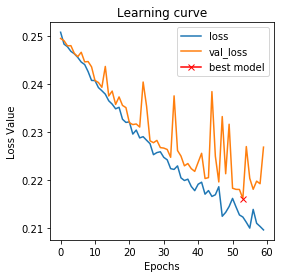

In [22]:
MLP3.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.001),
              metrics=['binary_accuracy'])

History = MLP3.fit(x_train, y_train, batch_size=16, epochs=60, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# In task4, the value of loss is decreasing and the value of accuracy is increasing as the model iterates. 0.0001 produced more stable results. We need more epochs to see which learning rate would produce over-fitted results.

# Task 5

In [26]:
# LeNet Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
def model(Base, img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model

model5A = model(32,1,100,100)
model5B = model(32,1,100,100)
model5C = model(8,1,100,100)
model5D = model(8,1,100,100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                2560064   
_________________________________________________________________
dense_31 (Dense)             (None, 1)               

Train on 1000 samples, validate on 200 samples
Epoch 1/20
1000/1000 - 1s - loss: 0.2498 - binary_accuracy: 0.5170 - val_loss: 0.2495 - val_binary_accuracy: 0.5100
Epoch 2/20
1000/1000 - 0s - loss: 0.2497 - binary_accuracy: 0.5230 - val_loss: 0.2494 - val_binary_accuracy: 0.5150
Epoch 3/20
1000/1000 - 1s - loss: 0.2497 - binary_accuracy: 0.5070 - val_loss: 0.2493 - val_binary_accuracy: 0.5300
Epoch 4/20
1000/1000 - 0s - loss: 0.2496 - binary_accuracy: 0.5100 - val_loss: 0.2493 - val_binary_accuracy: 0.5850
Epoch 5/20
1000/1000 - 1s - loss: 0.2496 - binary_accuracy: 0.5180 - val_loss: 0.2492 - val_binary_accuracy: 0.6050
Epoch 6/20
1000/1000 - 1s - loss: 0.2495 - binary_accuracy: 0.5510 - val_loss: 0.2491 - val_binary_accuracy: 0.6100
Epoch 7/20
1000/1000 - 1s - loss: 0.2495 - binary_accuracy: 0.5760 - val_loss: 0.2491 - val_binary_accuracy: 0.6200
Epoch 8/20
1000/1000 - 1s - loss: 0.2494 - binary_accuracy: 0.5360 - val_loss: 0.2490 - val_binary_accuracy: 0.6650
Epoch 9/20
1000/1000 - 0s

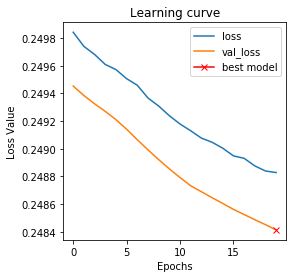

In [27]:
model5A.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.0001),
              metrics=['binary_accuracy'])

History = model5A.fit(x_train, y_train, batch_size=8, epochs=20, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 5A: Traning accuracy is 56.80%, validation accuracy is 56.50%. From the learning curves, we can see that loss is decreasing as the model iterates. 

Train on 1000 samples, validate on 200 samples
Epoch 1/80
1000/1000 - 1s - loss: 0.2502 - binary_accuracy: 0.5000 - val_loss: 0.2503 - val_binary_accuracy: 0.5000
Epoch 2/80
1000/1000 - 1s - loss: 0.2501 - binary_accuracy: 0.5000 - val_loss: 0.2501 - val_binary_accuracy: 0.5000
Epoch 3/80
1000/1000 - 1s - loss: 0.2499 - binary_accuracy: 0.5000 - val_loss: 0.2500 - val_binary_accuracy: 0.5000
Epoch 4/80
1000/1000 - 1s - loss: 0.2498 - binary_accuracy: 0.5000 - val_loss: 0.2499 - val_binary_accuracy: 0.5000
Epoch 5/80
1000/1000 - 1s - loss: 0.2498 - binary_accuracy: 0.5010 - val_loss: 0.2499 - val_binary_accuracy: 0.5000
Epoch 6/80
1000/1000 - 1s - loss: 0.2497 - binary_accuracy: 0.5040 - val_loss: 0.2498 - val_binary_accuracy: 0.5000
Epoch 7/80
1000/1000 - 0s - loss: 0.2497 - binary_accuracy: 0.5200 - val_loss: 0.2498 - val_binary_accuracy: 0.5100
Epoch 8/80
1000/1000 - 1s - loss: 0.2496 - binary_accuracy: 0.5240 - val_loss: 0.2497 - val_binary_accuracy: 0.5450
Epoch 9/80
1000/1000 - 1s

Epoch 71/80
1000/1000 - 1s - loss: 0.2483 - binary_accuracy: 0.5840 - val_loss: 0.2484 - val_binary_accuracy: 0.5800
Epoch 72/80
1000/1000 - 0s - loss: 0.2483 - binary_accuracy: 0.5950 - val_loss: 0.2483 - val_binary_accuracy: 0.5850
Epoch 73/80
1000/1000 - 0s - loss: 0.2483 - binary_accuracy: 0.6270 - val_loss: 0.2483 - val_binary_accuracy: 0.5850
Epoch 74/80
1000/1000 - 1s - loss: 0.2483 - binary_accuracy: 0.5960 - val_loss: 0.2483 - val_binary_accuracy: 0.6000
Epoch 75/80
1000/1000 - 1s - loss: 0.2482 - binary_accuracy: 0.5910 - val_loss: 0.2483 - val_binary_accuracy: 0.6050
Epoch 76/80
1000/1000 - 1s - loss: 0.2482 - binary_accuracy: 0.6060 - val_loss: 0.2482 - val_binary_accuracy: 0.6100
Epoch 77/80
1000/1000 - 1s - loss: 0.2482 - binary_accuracy: 0.6420 - val_loss: 0.2482 - val_binary_accuracy: 0.6050
Epoch 78/80
1000/1000 - 1s - loss: 0.2482 - binary_accuracy: 0.6420 - val_loss: 0.2482 - val_binary_accuracy: 0.5900
Epoch 79/80
1000/1000 - 1s - loss: 0.2482 - binary_accuracy: 0.5

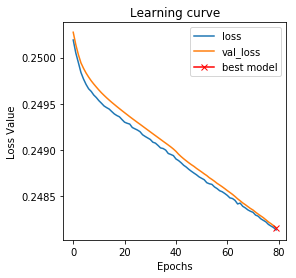

In [28]:
model5B.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.0001),
              metrics=['binary_accuracy'])

History = model5B.fit(x_train, y_train, batch_size=8, epochs=80, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 5B:The major difference is that the accuracy is higher and the loss is lower a little bit.

Train on 1000 samples, validate on 200 samples
Epoch 1/80
1000/1000 - 1s - loss: 0.2509 - binary_accuracy: 0.5000 - val_loss: 0.2507 - val_binary_accuracy: 0.5000
Epoch 2/80
1000/1000 - 0s - loss: 0.2505 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 3/80
1000/1000 - 0s - loss: 0.2502 - binary_accuracy: 0.5000 - val_loss: 0.2502 - val_binary_accuracy: 0.5000
Epoch 4/80
1000/1000 - 0s - loss: 0.2500 - binary_accuracy: 0.5000 - val_loss: 0.2500 - val_binary_accuracy: 0.5000
Epoch 5/80
1000/1000 - 0s - loss: 0.2499 - binary_accuracy: 0.5000 - val_loss: 0.2499 - val_binary_accuracy: 0.5000
Epoch 6/80
1000/1000 - 0s - loss: 0.2498 - binary_accuracy: 0.5000 - val_loss: 0.2498 - val_binary_accuracy: 0.5000
Epoch 7/80
1000/1000 - 0s - loss: 0.2497 - binary_accuracy: 0.5000 - val_loss: 0.2497 - val_binary_accuracy: 0.5000
Epoch 8/80
1000/1000 - 0s - loss: 0.2496 - binary_accuracy: 0.5000 - val_loss: 0.2496 - val_binary_accuracy: 0.5000
Epoch 9/80
1000/1000 - 0s

Epoch 71/80
1000/1000 - 0s - loss: 0.2479 - binary_accuracy: 0.6170 - val_loss: 0.2480 - val_binary_accuracy: 0.5850
Epoch 72/80
1000/1000 - 0s - loss: 0.2479 - binary_accuracy: 0.6260 - val_loss: 0.2480 - val_binary_accuracy: 0.5850
Epoch 73/80
1000/1000 - 0s - loss: 0.2479 - binary_accuracy: 0.6090 - val_loss: 0.2479 - val_binary_accuracy: 0.5850
Epoch 74/80
1000/1000 - 0s - loss: 0.2479 - binary_accuracy: 0.6230 - val_loss: 0.2479 - val_binary_accuracy: 0.5750
Epoch 75/80
1000/1000 - 0s - loss: 0.2478 - binary_accuracy: 0.6200 - val_loss: 0.2479 - val_binary_accuracy: 0.5800
Epoch 76/80
1000/1000 - 0s - loss: 0.2478 - binary_accuracy: 0.6000 - val_loss: 0.2479 - val_binary_accuracy: 0.5850
Epoch 77/80
1000/1000 - 0s - loss: 0.2478 - binary_accuracy: 0.6020 - val_loss: 0.2479 - val_binary_accuracy: 0.5800
Epoch 78/80
1000/1000 - 0s - loss: 0.2478 - binary_accuracy: 0.6200 - val_loss: 0.2478 - val_binary_accuracy: 0.5800
Epoch 79/80
1000/1000 - 0s - loss: 0.2478 - binary_accuracy: 0.6

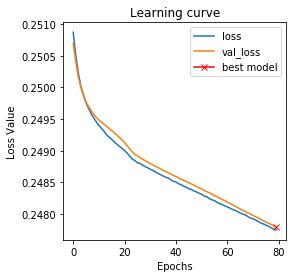

In [29]:
model5C.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.0001),
              metrics=['binary_accuracy'])

History = model5C.fit(x_train, y_train, batch_size=8, epochs=80, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 5C: The accuracy is lower than that in 5B because the number of feature maps at the first convolutional layer is less than that in 5B.

Train on 1000 samples, validate on 200 samples
Epoch 1/80
1000/1000 - 1s - loss: 0.2497 - binary_accuracy: 0.5290 - val_loss: 0.2493 - val_binary_accuracy: 0.5000
Epoch 2/80
1000/1000 - 0s - loss: 0.2495 - binary_accuracy: 0.5340 - val_loss: 0.2489 - val_binary_accuracy: 0.7350
Epoch 3/80
1000/1000 - 0s - loss: 0.2492 - binary_accuracy: 0.5430 - val_loss: 0.2485 - val_binary_accuracy: 0.6800
Epoch 4/80
1000/1000 - 0s - loss: 0.2489 - binary_accuracy: 0.5890 - val_loss: 0.2481 - val_binary_accuracy: 0.5300
Epoch 5/80
1000/1000 - 0s - loss: 0.2486 - binary_accuracy: 0.5740 - val_loss: 0.2477 - val_binary_accuracy: 0.6500
Epoch 6/80
1000/1000 - 0s - loss: 0.2481 - binary_accuracy: 0.6110 - val_loss: 0.2473 - val_binary_accuracy: 0.5050
Epoch 7/80
1000/1000 - 0s - loss: 0.2476 - binary_accuracy: 0.5930 - val_loss: 0.2465 - val_binary_accuracy: 0.5100
Epoch 8/80
1000/1000 - 0s - loss: 0.2467 - binary_accuracy: 0.5780 - val_loss: 0.2458 - val_binary_accuracy: 0.6950
Epoch 9/80
1000/1000 - 0s

Epoch 71/80
1000/1000 - 0s - loss: 0.1551 - binary_accuracy: 0.7740 - val_loss: 0.1793 - val_binary_accuracy: 0.7500
Epoch 72/80
1000/1000 - 0s - loss: 0.1568 - binary_accuracy: 0.7800 - val_loss: 0.1780 - val_binary_accuracy: 0.7600
Epoch 73/80
1000/1000 - 0s - loss: 0.1535 - binary_accuracy: 0.7860 - val_loss: 0.2083 - val_binary_accuracy: 0.7050
Epoch 74/80
1000/1000 - 0s - loss: 0.1537 - binary_accuracy: 0.7900 - val_loss: 0.1787 - val_binary_accuracy: 0.7550
Epoch 75/80
1000/1000 - 0s - loss: 0.1546 - binary_accuracy: 0.7860 - val_loss: 0.1805 - val_binary_accuracy: 0.7450
Epoch 76/80
1000/1000 - 0s - loss: 0.1489 - binary_accuracy: 0.7830 - val_loss: 0.1852 - val_binary_accuracy: 0.7550
Epoch 77/80
1000/1000 - 0s - loss: 0.1493 - binary_accuracy: 0.7990 - val_loss: 0.1890 - val_binary_accuracy: 0.7650
Epoch 78/80
1000/1000 - 0s - loss: 0.1487 - binary_accuracy: 0.8090 - val_loss: 0.2119 - val_binary_accuracy: 0.6850
Epoch 79/80
1000/1000 - 0s - loss: 0.1490 - binary_accuracy: 0.8

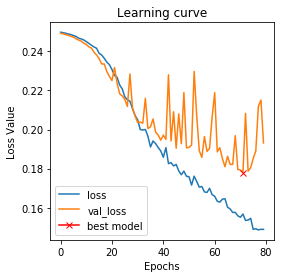

In [30]:
model5D.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.01),
              metrics=['binary_accuracy'])

History = model5D.fit(x_train, y_train, batch_size=8, epochs=80, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 5D-5H Answers

5D: In conclusion, the higher epochs could result in higher accuracy and the lower loss. At the same time, from the result we can see that the larger learning rate provides higher accuracy and smaller loss when the number of epoch is 80. But we can't say that larger learning rate performs better because larger learning rate can provides not only faster learning but also the risk of less stable convnvergence. On the other hand, smaller learning rate needs more epochs to learn and it could result in more stable convergence. 

5E: The purpose of the first two convolutional layers is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data. 

5F: The purpose of the last two dense layers is to use these features for classifying the input image into various classes based on the training dataset. Apart from classification, adding fully-connected layers is also a cheap way of learning non-linear combinations of these features.

5G: LeNet uses relatively less parameters and achieves better results than MLP does. Besides, Lenet also uses Maxpool to extract features, which is not applied in MLP.

5H: The number of neurons depends on the number of class in the case.And the choose of activation function depends on the requirement of output.For example, Sigmoid ,which we use here, has smooth gradient, output values bound between 0 and 1 and clear predictions.

# Task 6

In [84]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

img_w, img_h = 128, 128                                 # Setting the width and heights of the images
data_path = '/Lab1/Skin/'           # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)



Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


In [76]:
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
# AlexNet Model
def model(Base, img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(64))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    #model.summary()   
    return model

model6A = model(32,1,128,128)
model6B1 = model(16,1,128,128)
model6B2 = model(8,1,128,128)
model6C = model(8,1,128,128)

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 1s - loss: 0.2502 - binary_accuracy: 0.5160 - val_loss: 0.2493 - val_binary_accuracy: 0.5000
Epoch 2/50
1000/1000 - 1s - loss: 0.2486 - binary_accuracy: 0.5560 - val_loss: 0.2417 - val_binary_accuracy: 0.5050
Epoch 3/50
1000/1000 - 1s - loss: 0.2249 - binary_accuracy: 0.6470 - val_loss: 0.1862 - val_binary_accuracy: 0.7700
Epoch 4/50
1000/1000 - 1s - loss: 0.2017 - binary_accuracy: 0.7090 - val_loss: 0.2170 - val_binary_accuracy: 0.6750
Epoch 5/50
1000/1000 - 1s - loss: 0.1888 - binary_accuracy: 0.7170 - val_loss: 0.1845 - val_binary_accuracy: 0.7400
Epoch 6/50
1000/1000 - 1s - loss: 0.1810 - binary_accuracy: 0.7500 - val_loss: 0.1750 - val_binary_accuracy: 0.7650
Epoch 7/50
1000/1000 - 1s - loss: 0.1768 - binary_accuracy: 0.7550 - val_loss: 0.1668 - val_binary_accuracy: 0.7850
Epoch 8/50
1000/1000 - 1s - loss: 0.1648 - binary_accuracy: 0.7600 - val_loss: 0.1627 - val_binary_accuracy: 0.7900
Epoch 9/50
1000/1000 - 1s

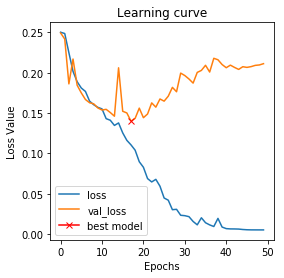

In [30]:
model6A.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.0001),
              metrics=['binary_accuracy'])

History = model6A.fit(x_train, y_train, batch_size=8, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 6A: From the results we can see that when the curve of validation loss began to going up, the curve of train loss was still going down. So the model is over-fitted. 

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 1s - loss: 0.2504 - binary_accuracy: 0.4990 - val_loss: 0.2497 - val_binary_accuracy: 0.5050
Epoch 2/50
1000/1000 - 1s - loss: 0.2501 - binary_accuracy: 0.5120 - val_loss: 0.2492 - val_binary_accuracy: 0.5000
Epoch 3/50
1000/1000 - 1s - loss: 0.2480 - binary_accuracy: 0.5670 - val_loss: 0.2519 - val_binary_accuracy: 0.5000
Epoch 4/50
1000/1000 - 1s - loss: 0.2415 - binary_accuracy: 0.5740 - val_loss: 0.2371 - val_binary_accuracy: 0.5250
Epoch 5/50
1000/1000 - 1s - loss: 0.2208 - binary_accuracy: 0.6610 - val_loss: 0.2499 - val_binary_accuracy: 0.5550
Epoch 6/50
1000/1000 - 1s - loss: 0.2060 - binary_accuracy: 0.6810 - val_loss: 0.2140 - val_binary_accuracy: 0.6350
Epoch 7/50
1000/1000 - 1s - loss: 0.1943 - binary_accuracy: 0.7060 - val_loss: 0.1756 - val_binary_accuracy: 0.7850
Epoch 8/50
1000/1000 - 1s - loss: 0.1765 - binary_accuracy: 0.7430 - val_loss: 0.2150 - val_binary_accuracy: 0.6550
Epoch 9/50
1000/1000 - 1s

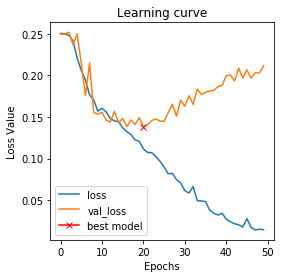

In [31]:
model6B1.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.0001),
              metrics=['binary_accuracy'])

History = model6B1.fit(x_train, y_train, batch_size=8, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 1s - loss: 0.2498 - binary_accuracy: 0.5100 - val_loss: 0.2491 - val_binary_accuracy: 0.5850
Epoch 2/50
1000/1000 - 1s - loss: 0.2489 - binary_accuracy: 0.5420 - val_loss: 0.2469 - val_binary_accuracy: 0.5300
Epoch 3/50
1000/1000 - 1s - loss: 0.2466 - binary_accuracy: 0.5690 - val_loss: 0.2537 - val_binary_accuracy: 0.5000
Epoch 4/50
1000/1000 - 1s - loss: 0.2338 - binary_accuracy: 0.6300 - val_loss: 0.2319 - val_binary_accuracy: 0.5900
Epoch 5/50
1000/1000 - 1s - loss: 0.2103 - binary_accuracy: 0.6820 - val_loss: 0.1921 - val_binary_accuracy: 0.7300
Epoch 6/50
1000/1000 - 1s - loss: 0.1837 - binary_accuracy: 0.7390 - val_loss: 0.1736 - val_binary_accuracy: 0.7850
Epoch 7/50
1000/1000 - 1s - loss: 0.1754 - binary_accuracy: 0.7550 - val_loss: 0.1651 - val_binary_accuracy: 0.8150
Epoch 8/50
1000/1000 - 1s - loss: 0.1685 - binary_accuracy: 0.7620 - val_loss: 0.1661 - val_binary_accuracy: 0.7700
Epoch 9/50
1000/1000 - 1s

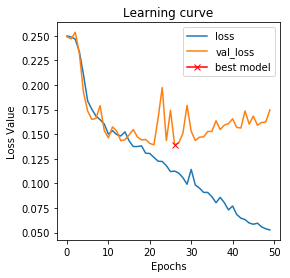

In [32]:
model6B2.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.0001),
              metrics=['binary_accuracy'])

History = model6B2.fit(x_train, y_train, batch_size=8, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 1s - loss: 0.2501 - binary_accuracy: 0.4980 - val_loss: 0.2496 - val_binary_accuracy: 0.5000
Epoch 2/50
1000/1000 - 0s - loss: 0.2498 - binary_accuracy: 0.5090 - val_loss: 0.2492 - val_binary_accuracy: 0.5050
Epoch 3/50
1000/1000 - 0s - loss: 0.2493 - binary_accuracy: 0.5350 - val_loss: 0.2495 - val_binary_accuracy: 0.5000
Epoch 4/50
1000/1000 - 0s - loss: 0.2476 - binary_accuracy: 0.5440 - val_loss: 0.2436 - val_binary_accuracy: 0.5200
Epoch 5/50
1000/1000 - 0s - loss: 0.2394 - binary_accuracy: 0.5920 - val_loss: 0.2482 - val_binary_accuracy: 0.4950
Epoch 6/50
1000/1000 - 0s - loss: 0.2179 - binary_accuracy: 0.6820 - val_loss: 0.2019 - val_binary_accuracy: 0.7150
Epoch 7/50
1000/1000 - 0s - loss: 0.1924 - binary_accuracy: 0.7010 - val_loss: 0.1998 - val_binary_accuracy: 0.7000
Epoch 8/50
1000/1000 - 0s - loss: 0.1912 - binary_accuracy: 0.7160 - val_loss: 0.1671 - val_binary_accuracy: 0.7900
Epoch 9/50
1000/1000 - 0s

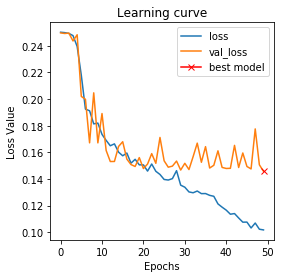

In [33]:
model6C.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.0001),
              metrics=['binary_accuracy'])

History = model6C.fit(x_train, y_train, batch_size=16, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 6C: Larger size of batch reduce the effects of overfitting. But it is still over-fitted

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 - 1s - loss: 0.2500 - binary_accuracy: 0.5210 - val_loss: 0.2492 - val_binary_accuracy: 0.6150
Epoch 2/100
1000/1000 - 0s - loss: 0.2493 - binary_accuracy: 0.5820 - val_loss: 0.2488 - val_binary_accuracy: 0.6450
Epoch 3/100
1000/1000 - 0s - loss: 0.2489 - binary_accuracy: 0.5530 - val_loss: 0.2484 - val_binary_accuracy: 0.6450
Epoch 4/100
1000/1000 - 0s - loss: 0.2484 - binary_accuracy: 0.5950 - val_loss: 0.2477 - val_binary_accuracy: 0.6200
Epoch 5/100
1000/1000 - 0s - loss: 0.2475 - binary_accuracy: 0.5900 - val_loss: 0.2468 - val_binary_accuracy: 0.5350
Epoch 6/100
1000/1000 - 0s - loss: 0.2476 - binary_accuracy: 0.5320 - val_loss: 0.2460 - val_binary_accuracy: 0.5300
Epoch 7/100
1000/1000 - 0s - loss: 0.2461 - binary_accuracy: 0.5470 - val_loss: 0.2445 - val_binary_accuracy: 0.5200
Epoch 8/100
1000/1000 - 0s - loss: 0.2438 - binary_accuracy: 0.6180 - val_loss: 0.2426 - val_binary_accuracy: 0.6550
Epoch 9/100
1000/

1000/1000 - 0s - loss: 0.1598 - binary_accuracy: 0.7780 - val_loss: 0.1572 - val_binary_accuracy: 0.7800
Epoch 71/100
1000/1000 - 0s - loss: 0.1653 - binary_accuracy: 0.7690 - val_loss: 0.1594 - val_binary_accuracy: 0.8050
Epoch 72/100
1000/1000 - 0s - loss: 0.1599 - binary_accuracy: 0.7770 - val_loss: 0.1570 - val_binary_accuracy: 0.7900
Epoch 73/100
1000/1000 - 0s - loss: 0.1615 - binary_accuracy: 0.7780 - val_loss: 0.1606 - val_binary_accuracy: 0.7750
Epoch 74/100
1000/1000 - 0s - loss: 0.1610 - binary_accuracy: 0.7820 - val_loss: 0.1596 - val_binary_accuracy: 0.7700
Epoch 75/100
1000/1000 - 0s - loss: 0.1599 - binary_accuracy: 0.7680 - val_loss: 0.1569 - val_binary_accuracy: 0.8000
Epoch 76/100
1000/1000 - 0s - loss: 0.1613 - binary_accuracy: 0.7790 - val_loss: 0.1570 - val_binary_accuracy: 0.7750
Epoch 77/100
1000/1000 - 0s - loss: 0.1581 - binary_accuracy: 0.7880 - val_loss: 0.1566 - val_binary_accuracy: 0.7800
Epoch 78/100
1000/1000 - 0s - loss: 0.1617 - binary_accuracy: 0.7700 

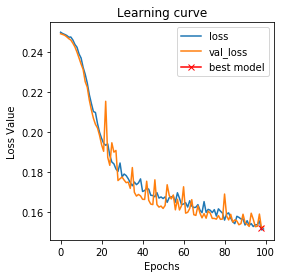

In [77]:
# 6D: Find the best model
model_best = model(16,1,128,128)
model_best.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.00001),
              metrics=['binary_accuracy'])

History = model_best.fit(x_train, y_train, batch_size=16, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 - 1s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 2/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 3/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 4/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 5/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 6/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 7/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 8/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 9/100
1000/

1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 71/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 72/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 73/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 74/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 75/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 76/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 77/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 - val_loss: 0.2504 - val_binary_accuracy: 0.5000
Epoch 78/100
1000/1000 - 0s - loss: 0.2503 - binary_accuracy: 0.5000 

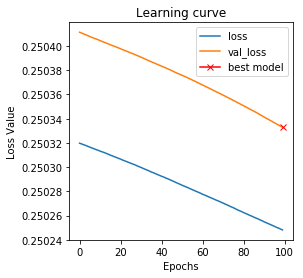

In [78]:
# SGD
model_best = model(16,1,128,128)
model_best.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.00001),
              metrics=['binary_accuracy'])

History = model_best.fit(x_train, y_train, batch_size=16, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 - 1s - loss: 0.2499 - binary_accuracy: 0.4970 - val_loss: 0.2494 - val_binary_accuracy: 0.5000
Epoch 2/100
1000/1000 - 0s - loss: 0.2494 - binary_accuracy: 0.5320 - val_loss: 0.2492 - val_binary_accuracy: 0.5000
Epoch 3/100
1000/1000 - 0s - loss: 0.2492 - binary_accuracy: 0.5000 - val_loss: 0.2488 - val_binary_accuracy: 0.5150
Epoch 4/100
1000/1000 - 0s - loss: 0.2488 - binary_accuracy: 0.5250 - val_loss: 0.2485 - val_binary_accuracy: 0.6900
Epoch 5/100
1000/1000 - 0s - loss: 0.2484 - binary_accuracy: 0.5600 - val_loss: 0.2479 - val_binary_accuracy: 0.5000
Epoch 6/100
1000/1000 - 0s - loss: 0.2480 - binary_accuracy: 0.5340 - val_loss: 0.2477 - val_binary_accuracy: 0.6650
Epoch 7/100
1000/1000 - 0s - loss: 0.2474 - binary_accuracy: 0.6290 - val_loss: 0.2467 - val_binary_accuracy: 0.7150
Epoch 8/100
1000/1000 - 0s - loss: 0.2465 - binary_accuracy: 0.6050 - val_loss: 0.2459 - val_binary_accuracy: 0.5000
Epoch 9/100
1000/

1000/1000 - 0s - loss: 0.1703 - binary_accuracy: 0.7570 - val_loss: 0.1666 - val_binary_accuracy: 0.7550
Epoch 71/100
1000/1000 - 0s - loss: 0.1706 - binary_accuracy: 0.7510 - val_loss: 0.1680 - val_binary_accuracy: 0.7450
Epoch 72/100
1000/1000 - 0s - loss: 0.1686 - binary_accuracy: 0.7560 - val_loss: 0.1698 - val_binary_accuracy: 0.8000
Epoch 73/100
1000/1000 - 0s - loss: 0.1676 - binary_accuracy: 0.7600 - val_loss: 0.1575 - val_binary_accuracy: 0.8000
Epoch 74/100
1000/1000 - 0s - loss: 0.1674 - binary_accuracy: 0.7590 - val_loss: 0.1590 - val_binary_accuracy: 0.7700
Epoch 75/100
1000/1000 - 0s - loss: 0.1693 - binary_accuracy: 0.7530 - val_loss: 0.1594 - val_binary_accuracy: 0.7650
Epoch 76/100
1000/1000 - 0s - loss: 0.1672 - binary_accuracy: 0.7640 - val_loss: 0.1571 - val_binary_accuracy: 0.7950
Epoch 77/100
1000/1000 - 0s - loss: 0.1682 - binary_accuracy: 0.7550 - val_loss: 0.1626 - val_binary_accuracy: 0.7600
Epoch 78/100
1000/1000 - 0s - loss: 0.1687 - binary_accuracy: 0.7520 

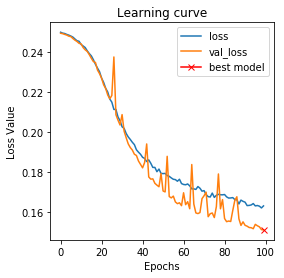

In [79]:
# RMSprop
from tensorflow.keras.optimizers import RMSprop
model_best = model(16,1,128,128)
model_best.compile(loss='mean_squared_error',
              optimizer = RMSprop(lr=0.00001),
              metrics=['binary_accuracy'])

History = model_best.fit(x_train, y_train, batch_size=16, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# 6D: The classification accuracy of the best model (using Adam) is 79.00%. When we replaced Adam with RMSprop, loss is lower and accuracy is higher than Adam. However, the result from SGD is very bad compared to Adam and RMSprop.

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 - 2s - loss: 0.9998 - binary_accuracy: 0.0000e+00 - val_loss: 0.9995 - val_binary_accuracy: 0.0000e+00
Epoch 2/100
1000/1000 - 1s - loss: 0.9995 - binary_accuracy: 0.0000e+00 - val_loss: 0.9992 - val_binary_accuracy: 0.0000e+00
Epoch 3/100
1000/1000 - 1s - loss: 0.9992 - binary_accuracy: 0.0000e+00 - val_loss: 0.9988 - val_binary_accuracy: 0.0000e+00
Epoch 4/100
1000/1000 - 1s - loss: 0.9987 - binary_accuracy: 0.0000e+00 - val_loss: 0.9983 - val_binary_accuracy: 0.0000e+00
Epoch 5/100
1000/1000 - 1s - loss: 0.9983 - binary_accuracy: 0.0000e+00 - val_loss: 0.9977 - val_binary_accuracy: 0.0000e+00
Epoch 6/100
1000/1000 - 2s - loss: 0.9975 - binary_accuracy: 0.0000e+00 - val_loss: 0.9968 - val_binary_accuracy: 0.0000e+00
Epoch 7/100
1000/1000 - 2s - loss: 0.9968 - binary_accuracy: 0.0000e+00 - val_loss: 0.9960 - val_binary_accuracy: 0.0000e+00
Epoch 8/100
1000/1000 - 1s - loss: 0.9959 - binary_accuracy: 0.0000e+00 - val_

Epoch 69/100
1000/1000 - 1s - loss: 0.7499 - binary_accuracy: 0.3610 - val_loss: 0.7282 - val_binary_accuracy: 0.3650
Epoch 70/100
1000/1000 - 1s - loss: 0.7483 - binary_accuracy: 0.3720 - val_loss: 0.7266 - val_binary_accuracy: 0.3600
Epoch 71/100
1000/1000 - 1s - loss: 0.7490 - binary_accuracy: 0.3610 - val_loss: 0.7415 - val_binary_accuracy: 0.4100
Epoch 72/100
1000/1000 - 1s - loss: 0.7453 - binary_accuracy: 0.3750 - val_loss: 0.7260 - val_binary_accuracy: 0.3600
Epoch 73/100
1000/1000 - 1s - loss: 0.7477 - binary_accuracy: 0.3680 - val_loss: 0.7292 - val_binary_accuracy: 0.3500
Epoch 74/100
1000/1000 - 1s - loss: 0.7478 - binary_accuracy: 0.3660 - val_loss: 0.7240 - val_binary_accuracy: 0.3650
Epoch 75/100
1000/1000 - 1s - loss: 0.7445 - binary_accuracy: 0.3660 - val_loss: 0.7239 - val_binary_accuracy: 0.3600
Epoch 76/100
1000/1000 - 1s - loss: 0.7473 - binary_accuracy: 0.3600 - val_loss: 0.7340 - val_binary_accuracy: 0.3400
Epoch 77/100
1000/1000 - 1s - loss: 0.7430 - binary_accu

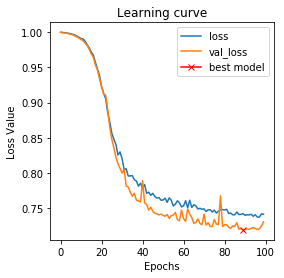

In [83]:
# 6E: Hinge loss

y_test[y_test == 0] = -1
y_train[y_train == 0] = -1

model_best = model(16,1,128,128)
model_best.compile(loss='hinge',
              optimizer = Adam(lr=0.00001),
              metrics=['binary_accuracy'])

History = model_best.fit(x_train, y_train, batch_size=16, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# Task 7 

In [13]:
# VGG
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
def model(Base, img_ch, img_width, img_height):
#Instantiate an empty model
    model = Sequential()
    model.add(Conv2D(Base, input_shape=(img_width, img_height, img_ch), kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(Base, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*2, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*2, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(Base*64, activation='relu'))
    model.add(Dense(Base*64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #model.summary()   
    return model



Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 2s - loss: 0.2500 - accuracy: 0.5010 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5570 - val_loss: 0.2500 - val_accuracy: 0.6150
Epoch 3/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5940 - val_loss: 0.2499 - val_accuracy: 0.5000
Epoch 4/50
1000/1000 - 1s - loss: 0.2499 - accuracy: 0.5260 - val_loss: 0.2499 - val_accuracy: 0.5950
Epoch 5/50
1000/1000 - 1s - loss: 0.2499 - accuracy: 0.5600 - val_loss: 0.2499 - val_accuracy: 0.5050
Epoch 6/50
1000/1000 - 1s - loss: 0.2499 - accuracy: 0.5880 - val_loss: 0.2497 - val_accuracy: 0.7550
Epoch 7/50
1000/1000 - 1s - loss: 0.2497 - accuracy: 0.6240 - val_loss: 0.2494 - val_accuracy: 0.7800
Epoch 8/50
1000/1000 - 1s - loss: 0.2493 - accuracy: 0.6000 - val_loss: 0.2487 - val_accuracy: 0.5400
Epoch 9/50
1000/1000 - 1s - loss: 0.2485 - accuracy: 0.5540 - val_loss: 0.2475 - val_accuracy: 0.5050
Epoch 10/50
1000/1000 - 1s - loss: 

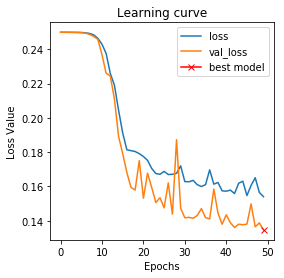

In [15]:
# Find the best model
import numpy as np
import matplotlib.pyplot as plt

#Adam
model_best7 = model(16,1,128,128)
model_best7.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.00001),
              metrics=['accuracy'])


History = model_best7.fit(x_train, y_train, batch_size=32, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 3/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 4/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 5/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 6/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 7/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 8/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 9/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 10/50
1000/1000 - 1s - loss: 

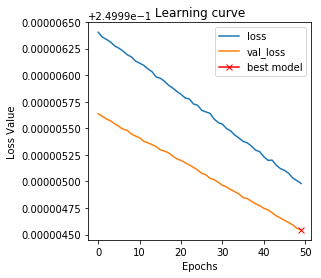

In [17]:
# SGD
model_best7 = model(16,1,128,128)
model_best7.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.00001),
              metrics=['accuracy'])


History = model_best7.fit(x_train, y_train, batch_size=32, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 - 2s - loss: 0.2500 - accuracy: 0.5010 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 - 1s - loss: 0.2500 - accuracy: 0.5140 - val_loss: 0.2499 - val_accuracy: 0.6000
Epoch 3/50
1000/1000 - 1s - loss: 0.2499 - accuracy: 0.5340 - val_loss: 0.2499 - val_accuracy: 0.5000
Epoch 4/50
1000/1000 - 1s - loss: 0.2499 - accuracy: 0.5250 - val_loss: 0.2498 - val_accuracy: 0.7400
Epoch 5/50
1000/1000 - 1s - loss: 0.2498 - accuracy: 0.5360 - val_loss: 0.2497 - val_accuracy: 0.7050
Epoch 6/50
1000/1000 - 1s - loss: 0.2496 - accuracy: 0.5570 - val_loss: 0.2496 - val_accuracy: 0.5100
Epoch 7/50
1000/1000 - 1s - loss: 0.2495 - accuracy: 0.5700 - val_loss: 0.2494 - val_accuracy: 0.5000
Epoch 8/50
1000/1000 - 1s - loss: 0.2492 - accuracy: 0.5550 - val_loss: 0.2493 - val_accuracy: 0.5250
Epoch 9/50
1000/1000 - 1s - loss: 0.2489 - accuracy: 0.5690 - val_loss: 0.2486 - val_accuracy: 0.6000
Epoch 10/50
1000/1000 - 1s - loss: 

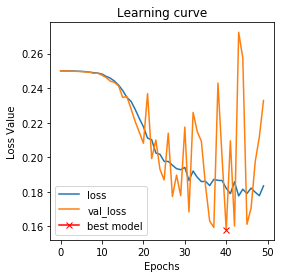

In [18]:
#RMSprop
model_best7 = model(16,1,128,128)
model_best7.compile(loss='mean_squared_error',
              optimizer = RMSprop(lr=0.00001),
              metrics=['accuracy'])


History = model_best7.fit(x_train, y_train, batch_size=32, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# For skin images, the performance of VGG is the best and Lenet is the worst. 

# Task 8 and 9

In [2]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

img_w, img_h = 128, 128                                 # Setting the width and heights of the images
data_path = '/Lab1/Bone/'          # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if 'AFF' in im_name:
            Label = np.array([0])
        elif 'NFF' in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1072  of train images
Reading: 200/1072  of train images
Reading: 400/1072  of train images
Reading: 600/1072  of train images
Reading: 800/1072  of train images
Reading: 1000/1072  of train images
Reading: 0/140 of test images
Reading: 100/140 of test images


In [5]:
# LeNet Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import matplotlib.pyplot as plt

def model(Base, img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #model.summary()
    
    return model

Train on 1072 samples, validate on 140 samples
Epoch 1/100
1072/1072 - 1s - loss: 0.2354 - accuracy: 0.6147 - val_loss: 0.2298 - val_accuracy: 0.6214
Epoch 2/100
1072/1072 - 0s - loss: 0.2086 - accuracy: 0.7034 - val_loss: 0.2383 - val_accuracy: 0.5714
Epoch 3/100
1072/1072 - 0s - loss: 0.1705 - accuracy: 0.8013 - val_loss: 0.1605 - val_accuracy: 0.8286
Epoch 4/100
1072/1072 - 0s - loss: 0.1287 - accuracy: 0.8629 - val_loss: 0.1268 - val_accuracy: 0.8429
Epoch 5/100
1072/1072 - 0s - loss: 0.0933 - accuracy: 0.9142 - val_loss: 0.1029 - val_accuracy: 0.8714
Epoch 6/100
1072/1072 - 0s - loss: 0.0786 - accuracy: 0.9188 - val_loss: 0.1018 - val_accuracy: 0.8786
Epoch 7/100
1072/1072 - 0s - loss: 0.0670 - accuracy: 0.9310 - val_loss: 0.0860 - val_accuracy: 0.8857
Epoch 8/100
1072/1072 - 0s - loss: 0.0587 - accuracy: 0.9450 - val_loss: 0.0784 - val_accuracy: 0.9000
Epoch 9/100
1072/1072 - 0s - loss: 0.0457 - accuracy: 0.9618 - val_loss: 0.0736 - val_accuracy: 0.9000
Epoch 10/100
1072/1072 - 0

Epoch 80/100
1072/1072 - 0s - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.0755 - val_accuracy: 0.9143
Epoch 81/100
1072/1072 - 0s - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.0751 - val_accuracy: 0.9143
Epoch 82/100
1072/1072 - 0s - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.0772 - val_accuracy: 0.9000
Epoch 83/100
1072/1072 - 0s - loss: 0.0012 - accuracy: 0.9991 - val_loss: 0.0738 - val_accuracy: 0.9071
Epoch 84/100
1072/1072 - 0s - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.0783 - val_accuracy: 0.8929
Epoch 85/100
1072/1072 - 0s - loss: 7.4510e-04 - accuracy: 0.9991 - val_loss: 0.0720 - val_accuracy: 0.9143
Epoch 86/100
1072/1072 - 0s - loss: 4.4254e-04 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9214
Epoch 87/100
1072/1072 - 0s - loss: 3.1931e-04 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9000
Epoch 88/100
1072/1072 - 0s - loss: 2.9162e-04 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9143
Epoch 89/100
1072/1072 - 0s - loss: 1.8825e-04 -

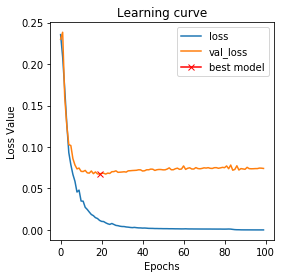

In [6]:
model_LeNet = model(32,1,128,128)
model_LeNet.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])


History = model_LeNet.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

In [9]:
# AlexNet Model
def model(Base, img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(64))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    #model.summary()   
    return model

Train on 1072 samples, validate on 140 samples
Epoch 1/50
1072/1072 - 1s - loss: 0.2469 - accuracy: 0.5830 - val_loss: 0.2497 - val_accuracy: 0.5071
Epoch 2/50
1072/1072 - 1s - loss: 0.2409 - accuracy: 0.5979 - val_loss: 0.2527 - val_accuracy: 0.5071
Epoch 3/50
1072/1072 - 1s - loss: 0.2376 - accuracy: 0.5979 - val_loss: 0.2569 - val_accuracy: 0.5071
Epoch 4/50
1072/1072 - 1s - loss: 0.2366 - accuracy: 0.5979 - val_loss: 0.2535 - val_accuracy: 0.5071
Epoch 5/50
1072/1072 - 1s - loss: 0.2344 - accuracy: 0.5979 - val_loss: 0.2522 - val_accuracy: 0.5071
Epoch 6/50
1072/1072 - 1s - loss: 0.2315 - accuracy: 0.6007 - val_loss: 0.2488 - val_accuracy: 0.5214
Epoch 7/50
1072/1072 - 1s - loss: 0.2265 - accuracy: 0.6185 - val_loss: 0.2405 - val_accuracy: 0.5571
Epoch 8/50
1072/1072 - 1s - loss: 0.2187 - accuracy: 0.6763 - val_loss: 0.2345 - val_accuracy: 0.5786
Epoch 9/50
1072/1072 - 1s - loss: 0.2055 - accuracy: 0.7276 - val_loss: 0.2117 - val_accuracy: 0.6286
Epoch 10/50
1072/1072 - 1s - loss: 

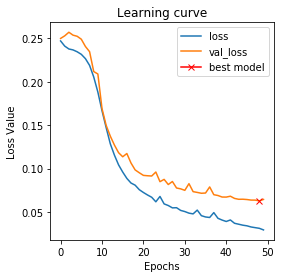

In [10]:
model_Alex = model(32,1,128,128)
model_Alex.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.00001),
              metrics=['accuracy'])


History = model_Alex.fit(x_train, y_train, batch_size=32, epochs=50, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



In [14]:
# VGG16
def model(Base, img_ch, img_width, img_height):
#Instantiate an empty model
    model = Sequential()
    model.add(Conv2D(Base, input_shape=(img_width, img_height, img_ch), kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(Base, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*2, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*2, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(Base*64, activation='relu'))
    model.add(Dense(Base*64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #model.summary()   
    return model

Train on 1072 samples, validate on 140 samples
Epoch 1/100
1072/1072 - 1s - loss: 0.2481 - accuracy: 0.5979 - val_loss: 0.2504 - val_accuracy: 0.5071
Epoch 2/100
1072/1072 - 1s - loss: 0.2410 - accuracy: 0.5979 - val_loss: 0.2621 - val_accuracy: 0.5071
Epoch 3/100
1072/1072 - 1s - loss: 0.2398 - accuracy: 0.5979 - val_loss: 0.2551 - val_accuracy: 0.5071
Epoch 4/100
1072/1072 - 1s - loss: 0.2392 - accuracy: 0.5979 - val_loss: 0.2539 - val_accuracy: 0.5071
Epoch 5/100
1072/1072 - 1s - loss: 0.2385 - accuracy: 0.5979 - val_loss: 0.2580 - val_accuracy: 0.5071
Epoch 6/100
1072/1072 - 1s - loss: 0.2377 - accuracy: 0.5979 - val_loss: 0.2532 - val_accuracy: 0.5071
Epoch 7/100
1072/1072 - 1s - loss: 0.2373 - accuracy: 0.5979 - val_loss: 0.2556 - val_accuracy: 0.5071
Epoch 8/100
1072/1072 - 1s - loss: 0.2348 - accuracy: 0.5979 - val_loss: 0.2538 - val_accuracy: 0.5143
Epoch 9/100
1072/1072 - 1s - loss: 0.2330 - accuracy: 0.5998 - val_loss: 0.2473 - val_accuracy: 0.5286
Epoch 10/100
1072/1072 - 1

Epoch 80/100
1072/1072 - 1s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0497 - val_accuracy: 0.9143
Epoch 81/100
1072/1072 - 1s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9143
Epoch 82/100
1072/1072 - 1s - loss: 0.0018 - accuracy: 0.9981 - val_loss: 0.0423 - val_accuracy: 0.9357
Epoch 83/100
1072/1072 - 1s - loss: 0.0043 - accuracy: 0.9944 - val_loss: 0.0739 - val_accuracy: 0.9000
Epoch 84/100
1072/1072 - 1s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9429
Epoch 85/100
1072/1072 - 1s - loss: 0.0041 - accuracy: 0.9963 - val_loss: 0.0473 - val_accuracy: 0.9286
Epoch 86/100
1072/1072 - 1s - loss: 0.0126 - accuracy: 0.9851 - val_loss: 0.0463 - val_accuracy: 0.9429
Epoch 87/100
1072/1072 - 1s - loss: 0.0246 - accuracy: 0.9646 - val_loss: 0.0513 - val_accuracy: 0.9357
Epoch 88/100
1072/1072 - 1s - loss: 0.0060 - accuracy: 0.9935 - val_loss: 0.0432 - val_accuracy: 0.9500
Epoch 89/100
1072/1072 - 1s - loss: 0.0032 - accuracy: 0.9972 - 

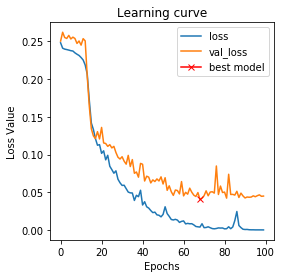

In [15]:
model_VGG = model(32,1,128,128)
model_VGG.compile(loss='mean_squared_error',
              optimizer = Adam(lr=0.00001),
              metrics=['accuracy'])


History = model_VGG.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))
%matplotlib inline
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

# Bones images are better classified. 

# Bonus part

In [2]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

img_w, img_h = 128, 128                                 # Setting the width and heights of the images
data_path = '/Lab1/X_ray/'          # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        elif pat3 in im_name:
            Label = np.array([2])
        elif pat4 in im_name:
            Label = np.array([3])
        elif pat5 in im_name:
            Label = np.array([4])
        elif pat6 in im_name:
            Label = np.array([5])
        elif pat7 in im_name:
            Label = np.array([6])
        elif pat8 in im_name:
            Label = np.array([7])
        elif pat9 in im_name:
            Label = np.array([8])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'C1', 'C2', 'C3', 
                                                   'C4', 'C5', 'C6', 'C7', 'C8'
                                                  , 'C9')])  
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'C1', 'C2', 'C3', 
                                                   'C4', 'C5', 'C6', 'C7', 'C8'
                                                  , 'C9')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/5780  of train images
Reading: 200/5780  of train images
Reading: 400/5780  of train images
Reading: 600/5780  of train images
Reading: 800/5780  of train images
Reading: 1000/5780  of train images
Reading: 1200/5780  of train images
Reading: 1400/5780  of train images
Reading: 1600/5780  of train images
Reading: 1800/5780  of train images
Reading: 2000/5780  of train images
Reading: 2200/5780  of train images
Reading: 2400/5780  of train images
Reading: 2600/5780  of train images
Reading: 2800/5780  of train images
Reading: 3000/5780  of train images
Reading: 3200/5780  of train images
Reading: 3400/5780  of train images
Reading: 3600/5780  of train images
Reading: 3800/5780  of train images
Reading: 4000/5780  of train images
Reading: 4200/5780  of train images
Reading: 4400/5780  of train images
Reading: 4600/5780  of train images
Reading: 4800/5780  of train images
Reading: 5000/5780  of train images
Reading: 5200/5780  of train images
Reading: 5400/5780  of train images

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [4]:
# LeNet Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import matplotlib.pyplot as plt

def model(Base, img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    #model.summary()
    
    return model

Train on 5780 samples, validate on 450 samples
Epoch 1/100
5780/5780 - 2s - loss: 1.5014 - accuracy: 0.5266 - val_loss: 1.8689 - val_accuracy: 0.3244
Epoch 2/100
5780/5780 - 2s - loss: 0.8263 - accuracy: 0.7408 - val_loss: 1.1660 - val_accuracy: 0.5378
Epoch 3/100
5780/5780 - 2s - loss: 0.5249 - accuracy: 0.8445 - val_loss: 0.7944 - val_accuracy: 0.7622
Epoch 4/100
5780/5780 - 2s - loss: 0.3846 - accuracy: 0.8912 - val_loss: 0.6262 - val_accuracy: 0.8178
Epoch 5/100
5780/5780 - 2s - loss: 0.3163 - accuracy: 0.9074 - val_loss: 0.5688 - val_accuracy: 0.8289
Epoch 6/100
5780/5780 - 2s - loss: 0.2769 - accuracy: 0.9138 - val_loss: 0.5036 - val_accuracy: 0.8467
Epoch 7/100
5780/5780 - 2s - loss: 0.2523 - accuracy: 0.9166 - val_loss: 0.4712 - val_accuracy: 0.8600
Epoch 8/100
5780/5780 - 2s - loss: 0.2379 - accuracy: 0.9220 - val_loss: 0.4472 - val_accuracy: 0.8533
Epoch 9/100
5780/5780 - 2s - loss: 0.2237 - accuracy: 0.9270 - val_loss: 0.4355 - val_accuracy: 0.8644
Epoch 10/100
5780/5780 - 2

Epoch 80/100
5780/5780 - 2s - loss: 0.0840 - accuracy: 0.9690 - val_loss: 0.2248 - val_accuracy: 0.9289
Epoch 81/100
5780/5780 - 2s - loss: 0.0797 - accuracy: 0.9706 - val_loss: 0.2238 - val_accuracy: 0.9378
Epoch 82/100
5780/5780 - 2s - loss: 0.0800 - accuracy: 0.9706 - val_loss: 0.2213 - val_accuracy: 0.9311
Epoch 83/100
5780/5780 - 2s - loss: 0.0805 - accuracy: 0.9704 - val_loss: 0.2131 - val_accuracy: 0.9400
Epoch 84/100
5780/5780 - 2s - loss: 0.0753 - accuracy: 0.9747 - val_loss: 0.2242 - val_accuracy: 0.9311
Epoch 85/100
5780/5780 - 2s - loss: 0.0787 - accuracy: 0.9723 - val_loss: 0.2099 - val_accuracy: 0.9378
Epoch 86/100
5780/5780 - 2s - loss: 0.0779 - accuracy: 0.9713 - val_loss: 0.2279 - val_accuracy: 0.9267
Epoch 87/100
5780/5780 - 2s - loss: 0.0774 - accuracy: 0.9708 - val_loss: 0.2432 - val_accuracy: 0.9267
Epoch 88/100
5780/5780 - 2s - loss: 0.0754 - accuracy: 0.9730 - val_loss: 0.2679 - val_accuracy: 0.9111
Epoch 89/100
5780/5780 - 2s - loss: 0.0725 - accuracy: 0.9734 - 

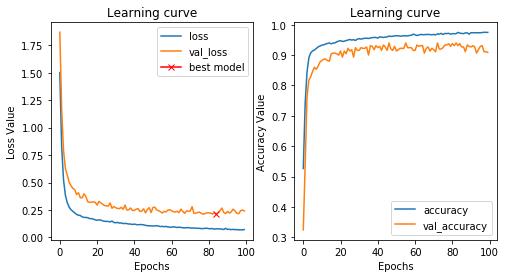

In [53]:
model_LeNet = model(32,1,128,128)
model_LeNet.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.00001),
              metrics=['accuracy'])


History = model_LeNet.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))

%matplotlib inline
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)

plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();


plt.subplot(1,2,2)
plt.title("Learning curve")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
# plt.plot( np.argmax(History.history["val_accuracy"]),
#          np.max(History.history["val_accuracy"]),
#          marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.legend();

# LeNet
Epoch 85/100    
loss: 0.0787 - accuracy: 0.9723    
val_loss: 0.2099 - val_accuracy: 0.9378

In [58]:
# AlexNet Model
def model(Base, img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(64))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    #model.summary()   
    return model

Train on 5780 samples, validate on 450 samples
Epoch 1/100
5780/5780 - 3s - loss: 1.7354 - accuracy: 0.4455 - val_loss: 2.1298 - val_accuracy: 0.3267
Epoch 2/100
5780/5780 - 3s - loss: 0.7281 - accuracy: 0.7587 - val_loss: 0.8688 - val_accuracy: 0.7467
Epoch 3/100
5780/5780 - 3s - loss: 0.3612 - accuracy: 0.8772 - val_loss: 0.5894 - val_accuracy: 0.8400
Epoch 4/100
5780/5780 - 3s - loss: 0.2849 - accuracy: 0.9047 - val_loss: 0.5385 - val_accuracy: 0.8533
Epoch 5/100
5780/5780 - 3s - loss: 0.2561 - accuracy: 0.9140 - val_loss: 0.5696 - val_accuracy: 0.8378
Epoch 6/100
5780/5780 - 3s - loss: 0.2392 - accuracy: 0.9190 - val_loss: 0.4182 - val_accuracy: 0.8800
Epoch 7/100
5780/5780 - 3s - loss: 0.2258 - accuracy: 0.9197 - val_loss: 0.4140 - val_accuracy: 0.8867
Epoch 8/100
5780/5780 - 3s - loss: 0.2068 - accuracy: 0.9298 - val_loss: 0.4118 - val_accuracy: 0.8844
Epoch 9/100
5780/5780 - 3s - loss: 0.2067 - accuracy: 0.9294 - val_loss: 0.3757 - val_accuracy: 0.9044
Epoch 10/100
5780/5780 - 3

Epoch 80/100
5780/5780 - 3s - loss: 0.0682 - accuracy: 0.9739 - val_loss: 0.1881 - val_accuracy: 0.9556
Epoch 81/100
5780/5780 - 3s - loss: 0.0619 - accuracy: 0.9754 - val_loss: 0.2299 - val_accuracy: 0.9289
Epoch 82/100
5780/5780 - 3s - loss: 0.0614 - accuracy: 0.9773 - val_loss: 0.2062 - val_accuracy: 0.9511
Epoch 83/100
5780/5780 - 3s - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.2546 - val_accuracy: 0.9244
Epoch 84/100
5780/5780 - 3s - loss: 0.0633 - accuracy: 0.9735 - val_loss: 0.2147 - val_accuracy: 0.9333
Epoch 85/100
5780/5780 - 3s - loss: 0.0592 - accuracy: 0.9779 - val_loss: 0.2089 - val_accuracy: 0.9378
Epoch 86/100
5780/5780 - 3s - loss: 0.0624 - accuracy: 0.9749 - val_loss: 0.2230 - val_accuracy: 0.9333
Epoch 87/100
5780/5780 - 3s - loss: 0.0560 - accuracy: 0.9782 - val_loss: 0.2399 - val_accuracy: 0.9267
Epoch 88/100
5780/5780 - 3s - loss: 0.0628 - accuracy: 0.9754 - val_loss: 0.2531 - val_accuracy: 0.9200
Epoch 89/100
5780/5780 - 3s - loss: 0.0629 - accuracy: 0.9770 - 

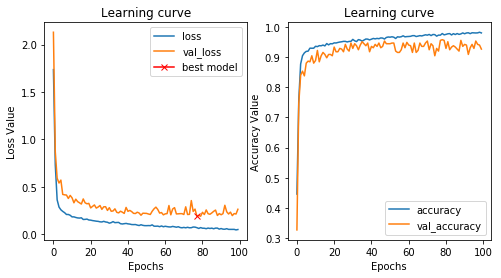

In [59]:
model_Alex = model(32,1,128,128)
model_Alex.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.00001),
              metrics=['accuracy'])


History = model_Alex.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))

%matplotlib inline
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)

plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();


plt.subplot(1,2,2)
plt.title("Learning curve")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
# plt.plot( np.argmax(History.history["val_accuracy"]),
#          np.max(History.history["val_accuracy"]),
#          marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.legend();

# AlexNet
Epoch 78/100    
loss: 0.0675 - accuracy: 0.9728    
val_loss: 0.1880 - val_accuracy: 0.9556

In [5]:
# VGG16
def model(Base, img_ch, img_width, img_height):
#Instantiate an empty model
    model = Sequential()
    model.add(Conv2D(Base, input_shape=(img_width, img_height, img_ch), kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(Base, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*2, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*2, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*4, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(Base*8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(Base*64, activation='relu'))
    model.add(Dense(Base*64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    #model.summary()   
    return model

Train on 5780 samples, validate on 450 samples
Epoch 1/100
5780/5780 - 8s - loss: 1.6254 - accuracy: 0.4618 - val_loss: 1.4265 - val_accuracy: 0.4289
Epoch 2/100
5780/5780 - 5s - loss: 0.5585 - accuracy: 0.7936 - val_loss: 0.5971 - val_accuracy: 0.8089
Epoch 3/100
5780/5780 - 6s - loss: 0.3211 - accuracy: 0.8907 - val_loss: 0.4464 - val_accuracy: 0.8644
Epoch 4/100
5780/5780 - 5s - loss: 0.2538 - accuracy: 0.9131 - val_loss: 0.3918 - val_accuracy: 0.8756
Epoch 5/100
5780/5780 - 6s - loss: 0.2126 - accuracy: 0.9234 - val_loss: 0.3132 - val_accuracy: 0.9044
Epoch 6/100
5780/5780 - 6s - loss: 0.1945 - accuracy: 0.9294 - val_loss: 0.2986 - val_accuracy: 0.9089
Epoch 7/100
5780/5780 - 6s - loss: 0.1703 - accuracy: 0.9379 - val_loss: 0.2959 - val_accuracy: 0.9089
Epoch 8/100
5780/5780 - 5s - loss: 0.1570 - accuracy: 0.9405 - val_loss: 0.3011 - val_accuracy: 0.8978
Epoch 9/100
5780/5780 - 6s - loss: 0.1479 - accuracy: 0.9464 - val_loss: 0.2321 - val_accuracy: 0.9244
Epoch 10/100
5780/5780 - 5

Epoch 80/100
5780/5780 - 6s - loss: 0.0231 - accuracy: 0.9910 - val_loss: 0.3099 - val_accuracy: 0.9178
Epoch 81/100
5780/5780 - 7s - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.3710 - val_accuracy: 0.9311
Epoch 82/100
5780/5780 - 7s - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.3021 - val_accuracy: 0.9467
Epoch 83/100
5780/5780 - 6s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.3875 - val_accuracy: 0.9311
Epoch 84/100
5780/5780 - 6s - loss: 3.7748e-04 - accuracy: 1.0000 - val_loss: 0.3855 - val_accuracy: 0.9356
Epoch 85/100
5780/5780 - 6s - loss: 2.1851e-04 - accuracy: 1.0000 - val_loss: 0.4002 - val_accuracy: 0.9333
Epoch 86/100
5780/5780 - 6s - loss: 1.5734e-04 - accuracy: 1.0000 - val_loss: 0.4165 - val_accuracy: 0.9333
Epoch 87/100
5780/5780 - 6s - loss: 1.2569e-04 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.9311
Epoch 88/100
5780/5780 - 6s - loss: 9.9574e-05 - accuracy: 1.0000 - val_loss: 0.4134 - val_accuracy: 0.9333
Epoch 89/100
5780/5780 - 6s - loss: 8.0330e-

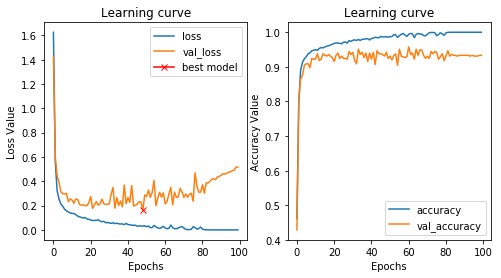

In [6]:
model_VGG = model(32,1,128,128)
model_VGG.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.00001),
              metrics=['accuracy'])


History = model_VGG.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, 
                    validation_data=(x_test, y_test))

%matplotlib inline
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)

plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();


plt.subplot(1,2,2)
plt.title("Learning curve")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
# plt.plot( np.argmax(History.history["val_accuracy"]),
#          np.max(History.history["val_accuracy"]),
#          marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.legend();

# VGG
Epoch 49/100    
loss: 0.0309 - accuracy: 0.9869    
val_loss: 0.1632 - val_accuracy: 0.9422

# The accuracy of AlexNet is the highest. The model of VGG is over-fitted while LeNet and AlexNet are not. 